In [2]:
import os
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
from torch import Tensor
import torch_geometric
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid
import networkx as nx
from networkx.algorithms import community

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
device

device(type='cuda')

In [5]:
data_dir = "Data/"

In [6]:
os.makedirs(data_dir, exist_ok=True)

In [7]:
dataset = Planetoid(root=data_dir, name='Cora')

In [8]:
dataset[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [9]:
data = dataset[0]

In [10]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [11]:
data.num_nodes

2708

In [12]:
data.num_edges

10556

In [13]:
print(f'Has isolated nodes: {data.has_isolated_nodes()}')  # False
print(f'Has self-loops: {data.has_self_loops()}')  # False
print(f'Is undirected: {data.is_undirected()}')  # True

Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [14]:
edge_index = data.edge_index.numpy()


In [15]:
print(edge_index.shape)

(2, 10556)


In [16]:
edge_example = edge_index[:, np.where(edge_index[0]==466)[0]]


In [17]:
edge_example

array([[ 466,  466,  466,  466,  466],
       [ 970, 1305, 1358, 1738, 2546]], dtype=int64)

In [18]:
node_example = np.unique(edge_example.flatten())

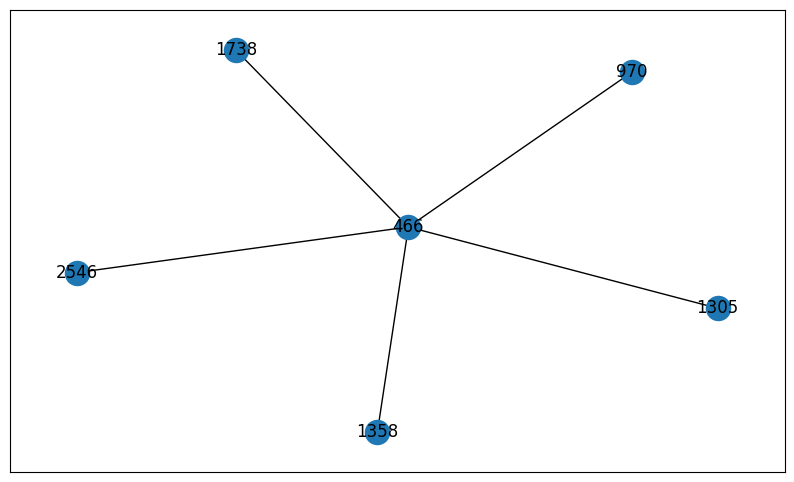

In [19]:
plt.figure(figsize=(10, 6))
G = nx.Graph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example[0], edge_example[1])))
nx.draw_networkx(G, with_labels=True)

In [20]:
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
# Average node degree: 3.90

Average node degree: 3.90


,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0


2708
10556


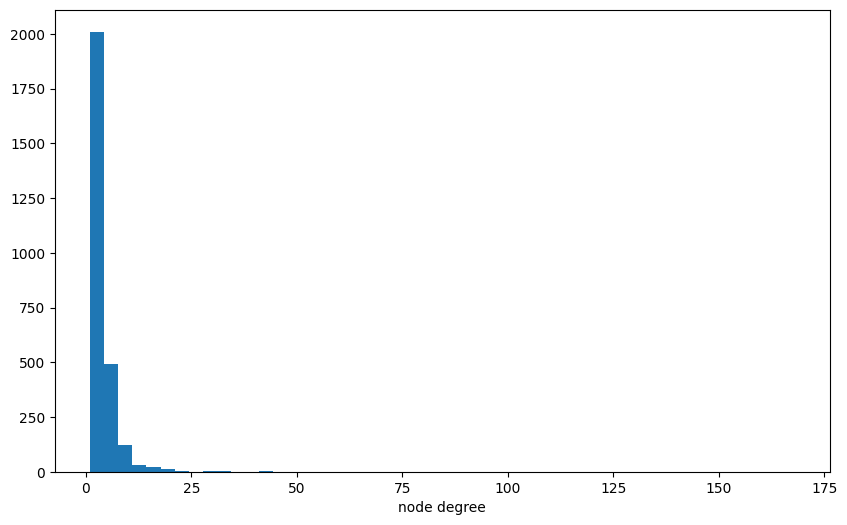

In [21]:
G = to_networkx(data, to_undirected=True)
degrees = [val for (node, val) in G.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))
print(len(degrees))
print(sum(degrees))
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.xlabel("node degree")
plt.show()

In [22]:
print(f"Graph name: {G}")
print("Nodes:", G.nodes())
print("Edges:", G.edges())

Graph name: Graph with 2708 nodes and 5278 edges
Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210

In [ ]:
# Find the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

In [ ]:
G = to_networkx(data, to_undirected=True)
pos = nx.spring_layout(G, seed=42)
cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))
cent_array = np.array(list(cent.values()))
threshold = sorted(cent_array, reverse=True)[10]
print("threshold", threshold)
cent_bin = np.where(cent_array >= threshold, 1, 0.1)
plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
#                                cmap=plt.cm.plasma,
                               node_color=cent_bin,
                               nodelist=list(cent.keys()),
                               alpha=cent_bin)
edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.3)
plt.show()

In [ ]:
# check training nodes
print("# of nodes to train on: ", data.train_mask.sum().item())

# check test nodes
print("# of nodes to test on: ", data.test_mask.sum().item())

# check validation nodes
print("# of nodes to validate on: ", data.val_mask.sum().item())

In [ ]:
print(f'Number of features: {data.num_node_features}')

In [ ]:
print(len(data.x[0]))
data.x[0][:20]

In [ ]:
print(f'Number of edge features: {data.num_edge_features}')
# Number of edge features: 0

In [ ]:
print(f'Number of classes: {dataset.num_classes}')
# Number of classes: 7

In [ ]:
dataset.num_classes

In [ ]:
label_dict = {
    0: "Theory",
    1: "Reinforcement_Learning",
    2: "Genetic_Algorithms",
    3: "Neural_Networks",
    4: "Probabilistic_Methods",
    5: "Case_Based",
    6: "Rule_Learning"}

In [ ]:
G

In [ ]:
data.y[:20]

In [ ]:
counter = collections.Counter(data.y.numpy())
counter = dict(counter)
print(counter)
count = [x[1] for x in sorted(counter.items())]
plt.figure(figsize=(10, 6))
plt.bar(range(7), count)
plt.xlabel("class", size=20)
plt.show()

In [ ]:
G = to_networkx(data, to_undirected=True)
node_color = []
nodelist = [[], [], [], [], [], [], []]
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']
labels = data.y
for n, i in enumerate(labels):
    node_color.append(colorlist[i])
    nodelist[i].append(n)
pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize = (10, 10))
labellist = list(label_dict.values())
for num, i in enumerate(zip(nodelist, labellist)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size = 5, node_color = colorlist[num], label=l)
nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [ ]:
labels = data.y.numpy()
connected_labels_set = list(map(lambda x: labels[x], data.edge_index.numpy()))
connected_labels_set = np.array(connected_labels_set)
def add_missing_keys(counter, classes):
    for x in classes:
        if x not in counter.keys():
            counter[x] = 0
    return counter
label_connection_counts = []
for i in range(7):
    print(f"label: {i}")
    connected_labels = connected_labels_set[:, np.where(connected_labels_set[0] == i)[0]]
    print(connected_labels.shape[1], "edges")
    counter = collections.Counter(connected_labels[1])
    counter = dict(counter)
    print(counter)
    counter = add_missing_keys(counter, range(7))
    items = sorted(counter.items())
    items = [x[1] for x in items]
    label_connection_counts.append(items)
label_connection_counts = np.array(label_connection_counts)
plt.figure(figsize=(9, 7))
plt.rcParams["font.size"] = 13
hm = sns.heatmap(label_connection_counts, annot=True, cmap='hot_r', cbar=True, square=True)
plt.xlabel("class",size=20)
plt.ylabel("class",size=20)
plt.tight_layout()
plt.show()

In [ ]:
label_connection_counts.diagonal().sum() / label_connection_counts.sum()
# 0.8099658961727927

In [ ]:
def scaling(array):
    return array / sum(array)
label_connection_counts_scaled = np.apply_along_axis(scaling, 1, label_connection_counts)
plt.figure(figsize=(9, 7))
plt.rcParams["font.size"] = 13
hm = sns.heatmap(
    label_connection_counts_scaled,
    annot=True,
    cmap='hot_r',
    fmt="1.2f",
    cbar=True,
    square=True)
plt.xlabel("class",size=20)
plt.ylabel("class",size=20)
plt.tight_layout()
plt.show()

In [ ]:
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Number of validation nodes: {data.val_mask.sum()}')
print(f'Number of test nodes: {data.test_mask.sum()}')

In [ ]:
split_type_array = np.zeros(data.num_nodes)
split_type_array[np.where(data.train_mask == True)[0]] = 1
split_type_array[np.where(data.val_mask == True)[0]] = 2
split_type_array[np.where(data.test_mask == True)[0]] = 3
split_type_array
plt.scatter(range(2708), split_type_array)
plt.xlabel("index")
plt.show()

In [ ]:
titles = ["Training", "Validation", "Test"]
fig, axes = plt.subplots(ncols=3, figsize=(21, 6))
for i in range(3):
    counter = collections.Counter(data.y.numpy()[np.where(split_type_array == i + 1)[0]])
    counter = dict(counter)
    print(titles[i], counter)
    count = [x[1] for x in sorted(counter.items())]
# plt.figure(figsize=(10, 6))
    axes[i].bar(range(7), count)
    axes[i].set_xlabel("class", size=20)
    axes[i].set_title(titles[i])
plt.show()

In [23]:
import os
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
from torch import Tensor
import torch_geometric
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid
import networkx as nx
from networkx.algorithms import community

In [24]:
# Set random seed for reproducibility
import numpy as np

seed_value = 42
np.random.seed(seed_value)

In [ ]:
# Create a graph
G = nx.karate_club_graph()


In [ ]:
G

In [25]:
from node2vec_def.node2vec import Node2Vec

In [26]:
# Find the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 2708
Number of edges: 5278


In [27]:
# Set hyperparameters
dimensions = 64
walk_length = 30
num_walks = 50
p = 1.0
q = 1.0
T = 10  # Length of random walks for similarity
learning_rate = 0.01

In [28]:
node2vec = Node2Vec(graph=G, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks, p=p, q=q, T=T, learning_rate=learning_rate,window_size=10)


In [ ]:
node2vec.train()


Total Walks:   0%|                                                                                                                  | 0/50 [00:00<?, ?it/s]

In [ ]:
embeddings = node2vec.get_embeddings()


In [ ]:
embeddings

In [ ]:
import networkx as nx
import torch
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import community  # Install this library using 'pip install python-louvain'
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Extract the node names and their corresponding embeddings
nodes = list(embeddings.keys())
embedding_vectors = [embeddings[node] for node in nodes]

# Perform PCA to reduce dimensionality (e.g., to 2 dimensions)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(embedding_vectors)

# Create a scatter plot of the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.title('PCA of Node Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Annotate the points with node labels (optional)
for i, node in enumerate(nodes):
    plt.annotate(node, (principal_components[i, 0], principal_components[i, 1]), fontsize=8)

plt.show()

In [ ]:
# Perform community detection using the Louvain algorithm
partition = community.best_partition(G)

# Extract the node names and their corresponding embeddings
nodes = list(embeddings.keys())
embedding_vectors = [embeddings[node] for node in nodes]

# Perform PCA to reduce dimensionality (e.g., to 2 dimensions)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(embedding_vectors)



In [ ]:
# Create a scatter plot of the PCA components, colored by clusters
plt.figure(figsize=(8, 6))

# Define a color map for clusters
cmap = plt.get_cmap('tab20')

# Plot nodes in different colors based on their clusters
for cluster_id in set(partition.values()):
    cluster_nodes = [node for node, cluster in partition.items() if cluster == cluster_id]
    cluster_embeddings = [principal_components[nodes.index(node)] for node in cluster_nodes]
    x, y = zip(*cluster_embeddings)
    plt.scatter(x, y, alpha=0.5, label=f'Cluster {cluster_id}', color=cmap(cluster_id))

plt.title('PCA of Node Embeddings with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Annotate the points with node labels (optional)
for i, node in enumerate(nodes):
    plt.annotate(node, (principal_components[i, 0], principal_components[i, 1]), fontsize=8)

# Add a legend
plt.legend()

plt.show()